<div class="alert alert-block alert-info" align="center">
    <h1>
        Imports
    </h1>
</div>

In [1]:
import requests
from bs4 import BeautifulSoup
import io
import networkx as nx
import matplotlib.pyplot as plt
import re

<div class="alert alert-block alert-info" align="center">
    <h1>
        Fonctions
    </h1>
</div>

In [2]:
def get_edges(graphe):
    for i in range(len(graphe)-1):
        print(dicto[graphe[i]] + ' ' + G[graphe[i]][graphe[i+1]]['label'] + ' ' + dicto[graphe[i+1]])

<div class="alert alert-block alert-info" align="center">
    <h1>
        Lecture de la phrase
    </h1>
</div>

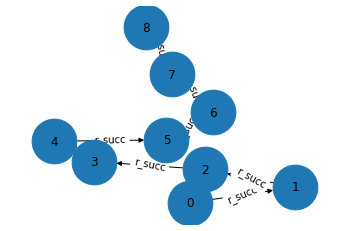

In [6]:
phrase = 'poisson est animal le chat est aussi un animal'.split(' ')
dicto = {}

G = nx.DiGraph()

for i in range(len(phrase)-1):
    G.add_edges_from([(i, i+1)], label='r_succ')
    dicto[i] = phrase[i]
    if(i == len(phrase)-2):
        dicto[i+1] = phrase[i+1]

edge_labels = dict([((u,v,),d['label']) for u,v,d in G.edges(data=True)])

pos = nx.spring_layout(G)

nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

nx.draw(G, pos, with_labels=True, node_size=2000,edge_cmap=plt.cm.Reds)

plt.show()

<div class="alert alert-block alert-info" align="center">
    <h1>
        Affichage
    </h1>
</div>

In [7]:
print(list(G.nodes))
print(list(G.edges))
print(list(G.nodes)[0])
print(list(G.edges)[0])
print(G[0][1])
print(G.edges[0, 1]['label'])

graphe = list(G.nodes)
get_edges(graphe)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)]
0
(0, 1)
{'label': 'r_succ'}
r_succ
poisson r_succ est
est r_succ animal
animal r_succ le
le r_succ chat
chat r_succ est
est r_succ aussi
aussi r_succ un
un r_succ animal


<div class="alert alert-block alert-info" align="center">
    <h1>
        Extraire les relations
    </h1>
</div>

<div class="alert alert-block alert-info" align="center">
    <h1>
        Utilisation de jeux de mots
    </h1>
</div>

# Récupération des informations sur les mots

In [8]:
# Mots déjà existants
exists = []

for word in phrase:
    if(word not in exists):
        print(word + ' n\'existe pas')
        # Envoie de la requete à jdm
        url = "http://www.jeuxdemots.org/rezo-dump.php?gotermsubmit=Chercher&gotermrel=" + word + "&rel="
        exists.append(word)

        # Reponse de la requete
        response = requests.get(url)

        # bs4
        soup = BeautifulSoup(response.text, features = 'lxml')

        # Chercher la balise CODE
        mycode = soup.find('code')
        
#         # Traitement sur les relations
#         # Parcourir la balise CODE
#         s = io.StringIO(str(mycode))
#         for line in s:
#             if(re.match('e;.*;\'' + f + '\';.*;.*', line)):
#                 a1 = line.split(';')[1]
#             if(re.match('r;.*;\'' + str(type_map[k]) + '\';.*;.*', line)):
#                 a2 = line.split(';')[1]
#             if(re.match('r;.*;\'' + str(type_map[k]) + '\';.*;.*', line)):
#                 r;15821256;42271;146885;4;27
#                 if(int(line.split(';')[5]) > 0):
#                     words_list4.update(generate_dict(f, k))
#                     break
        
        f = open("words/" + word + ".txt", "w")
        f.write(str(mycode))
        f.close()
    else:
        print(word + ' existe')
        # Open and read the file after the appending:
        f = open("words/" + word + ".txt", "r")
        #print(f.read())
        f.close()

poisson n'existe pas
est n'existe pas
animal n'existe pas
le n'existe pas
chat n'existe pas
est existe
aussi n'existe pas
un n'existe pas
animal existe


# Vérifier si les relations existent

Si oui : ok
<br/>
Si non : dire pourquoi
<br/>
Si ne sait pas : chercher l'inférence et donner l'explication